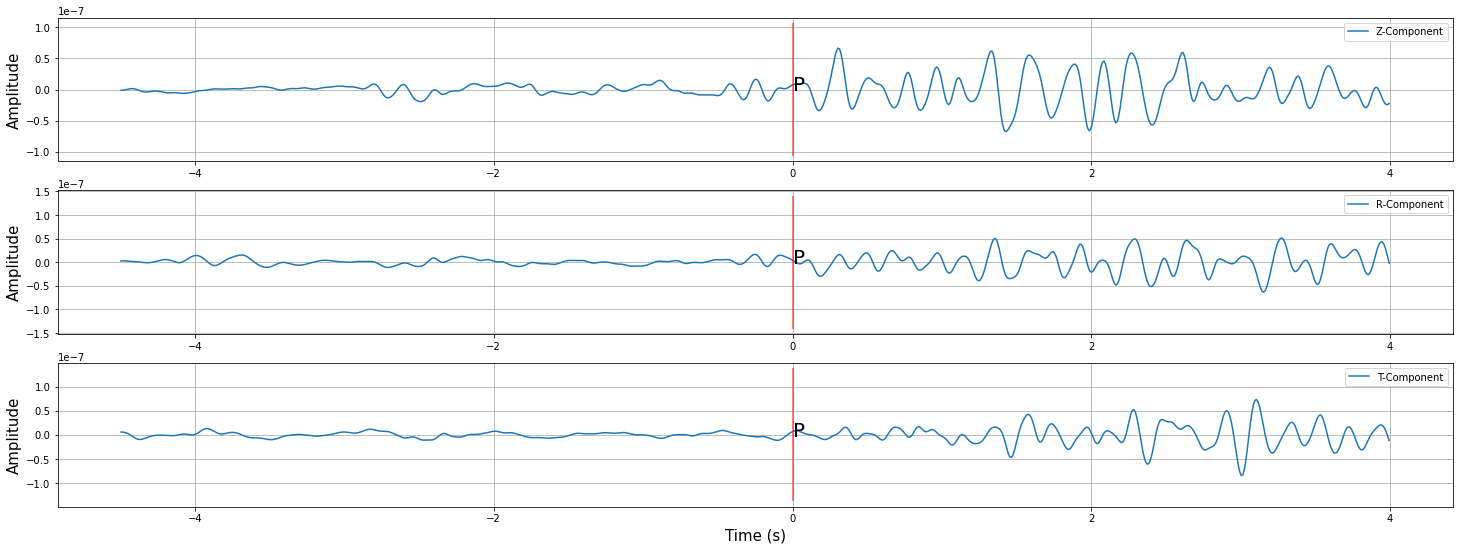

In [1]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/AZ.LVA2..BHZ.SAC.bp.cut")
st1 = read(f"{wtdir}/{evt}/AZ.LVA2..BHR.SAC.bp.cut")
st2 = read(f"{wtdir}/{evt}/AZ.LVA2..BHT.SAC.bp.cut")

truncation = 4

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)
truncated_t = t[3*850:truncation*850]
#print(len(t))

plt.figure(figsize=(25,9))
plt.subplot(311)
#plt.plot(t,st[0].data,label="Z-Component")
truncated_data0 = st[0].data[3*850:truncation*850]

plt.plot(truncated_t,truncated_data0,label="Z-Component")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st[0].data)*0.5, max(st[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(312)
#plt.plot(t,st1[0].data,label="R-Component")
truncated_data1 = st1[0].data[3*850:truncation*850]
plt.plot(truncated_t,truncated_data1,label="R-Component")

plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st1[0].data)*0.5, max(st1[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st1[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(313)
#plt.plot(t,st2[0].data,label="T-Component")
truncated_data2 = st2[0].data[3*850:truncation*850]
plt.plot(truncated_t ,truncated_data2,label="T-Component")

plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st2[0].data)*0.5, max(st2[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st2[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()

In [13]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/AZ.RDM..BHZ.SAC.bp.cut")
st1 = read(f"{wtdir}/{evt}/AZ.RDM..BHR.SAC.bp.cut")
st2 = read(f"{wtdir}/{evt}/AZ.RDM..BHT.SAC.bp.cut")
TNoise1 = 15  # noise window_left before t1
TNoise2 = 5   # noise window_right before t1
TSignal1 = 5  # signal window_left before t1 ***should this be after?
TSignal2 = 10 

def print_snr(st, TNoise1, TNoise2, TSignal1, TSignal2):
    
    
    
    T = get_sac_reftime(st.stats.sac) + st.stats.sac.t1
    # measure noise level
    tr = st.copy()
    tr.trim(starttime = T-TNoise1, endtime = T-TNoise2, fill_value=0)
    Noisamean = sum(abs(tr.data))/len(tr.data)
    # measure signal level
    tr = st.copy()
    tr.trim(starttime = T+TSignal1, endtime = T+TSignal2, fill_value=0)
    SignMax = max(abs(tr.data))
    # define the signal to noise value
    snr = SignMax/Noisamean
    print(f"snr of {st}: {snr}")
def print_trace_graphRTZ(st, st1, st2):
    truncation = 6
    t = np.arange(st.stats.sac.b, st.stats.npts / st.stats.sampling_rate + st.stats.sac.b, st.stats.delta)
    truncated_t = t[3*850:truncation*850]
    #print(len(t))

    plt.figure(figsize=(25,9))
    plt.subplot(311)
    #plt.plot(t,st.data,label="Z-Component")
    truncated_data0 = st.data[3*850:truncation*850]

    plt.plot(truncated_t,truncated_data0,label="Z-Component")
    #first-P arrival
    plt.plot([st.stats.sac.t1, st.stats.sac.t1], [-1*max(st.data)*0.5, max(st.data)*0.5], color="red", alpha=0.5, linewidth=2)
    plt.text(st.stats.sac.t1, -1*max(st.data)*0.01, 'P', fontsize=20)
    plt.legend()
    plt.ylabel("Amplitude",fontsize=15)
    plt.grid()

    plt.subplot(312)
    #plt.plot(t,st.data,label="R-Component")
    truncated_data1 = st.data[3*850:truncation*850]
    plt.plot(truncated_t,truncated_data1,label="R-Component")

    plt.plot([st.stats.sac.t1, st.stats.sac.t1], [-1*max(st.data)*0.5, max(st.data)*0.5], color="red", alpha=0.5, linewidth=2)
    plt.text(st.stats.sac.t1, -1*max(st.data)*0.01, 'P', fontsize=20)
    plt.legend()
    plt.ylabel("Amplitude",fontsize=15)
    plt.grid()

    plt.subplot(313)
    #plt.plot(t,st2.data,label="T-Component")
    truncated_data2 = st2.data[3*850:truncation*850]
    plt.plot(truncated_t ,truncated_data2,label="T-Component")

    plt.plot([st.stats.sac.t1, st.stats.sac.t1], [-1*max(st2.data)*0.5, max(st2.data)*0.5], color="red", alpha=0.5, linewidth=2)
    plt.text(st.stats.sac.t1, -1*max(st2.data)*0.01, 'P', fontsize=20)
    plt.legend()
    plt.ylabel("Amplitude",fontsize=15)
    plt.xlabel("Time (s)",fontsize=15)
    plt.grid()
    
    plt.show()
    

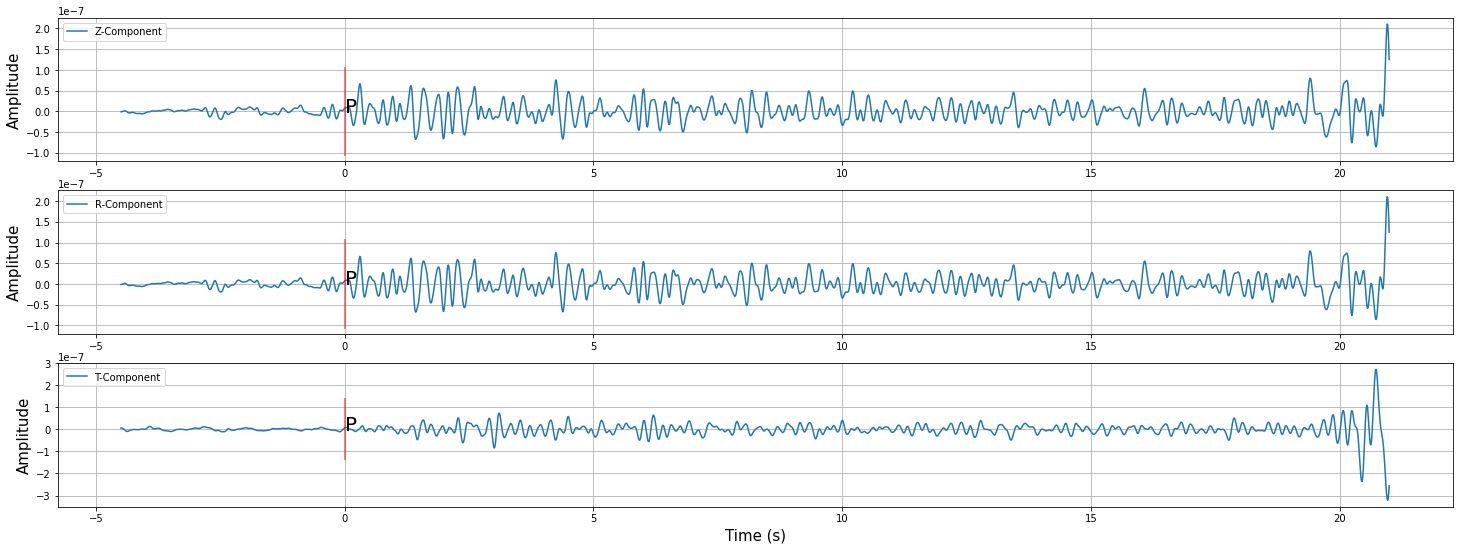

snr of AZ.LVA2..BHZ | 2022-01-02T00:15:44.084454Z - 2022-01-02T00:17:46.444454Z | 100.0 Hz, 12237 samples: 12.86218678279559
snr of AZ.LVA2..BHR | 2022-01-02T00:15:44.084454Z - 2022-01-02T00:17:46.444454Z | 100.0 Hz, 12237 samples: 13.83979779149398
snr of AZ.LVA2..BHT | 2022-01-02T00:15:44.084454Z - 2022-01-02T00:17:46.444454Z | 100.0 Hz, 12237 samples: 15.121449278008223
20220102001614080


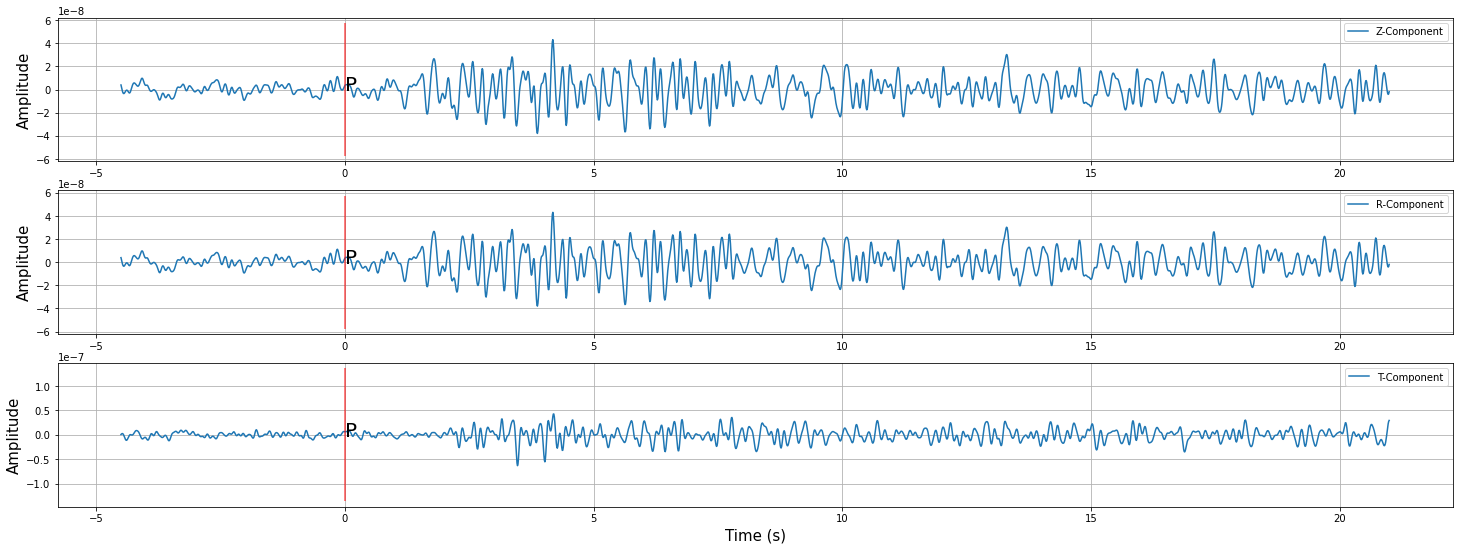

snr of AZ.RDM..BHZ | 2022-01-02T00:15:44.080349Z - 2022-01-02T00:17:41.400349Z | 100.0 Hz, 11733 samples: 13.633234682150425
snr of AZ.RDM..BHR | 2022-01-02T00:15:44.080448Z - 2022-01-02T00:17:41.400448Z | 100.0 Hz, 11733 samples: 15.52559825737603
snr of AZ.RDM..BHT | 2022-01-02T00:15:44.080349Z - 2022-01-02T00:17:41.400349Z | 100.0 Hz, 11733 samples: 9.619702483380928
20220102001614080


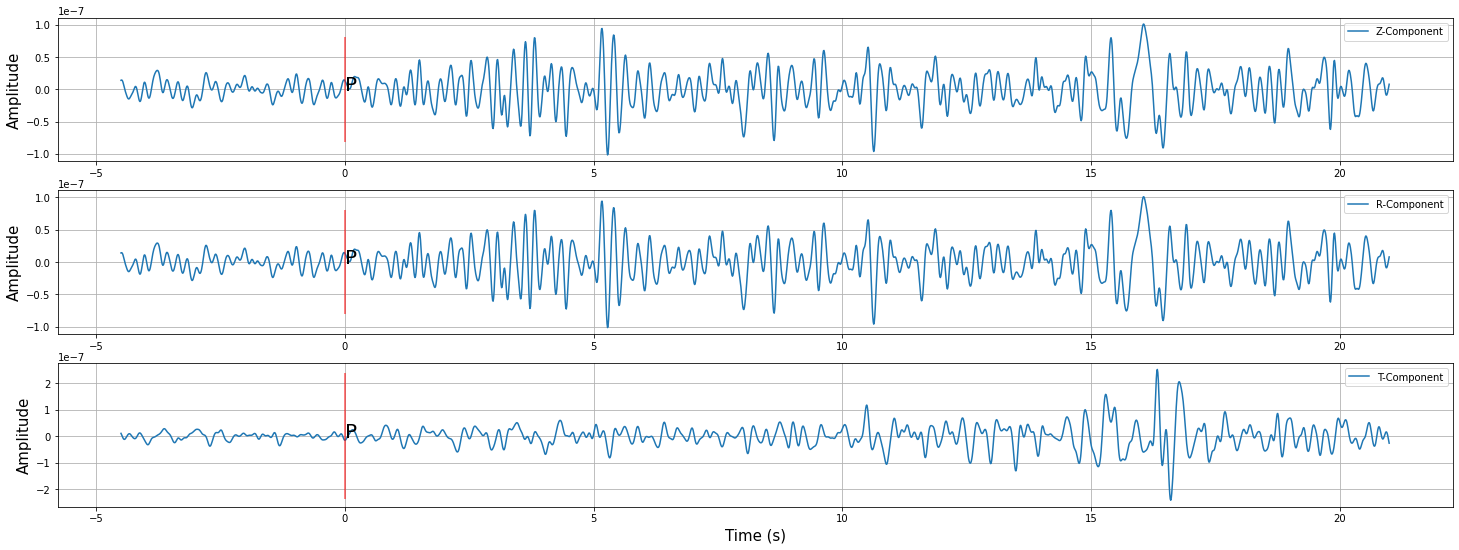

snr of AZ.SND..BHZ | 2022-01-02T00:15:44.078936Z - 2022-01-02T00:17:43.998936Z | 100.0 Hz, 11993 samples: 11.699340936004104
snr of AZ.SND..BHR | 2022-01-02T00:15:44.078936Z - 2022-01-02T00:17:43.998936Z | 100.0 Hz, 11993 samples: 7.692158267627023
snr of AZ.SND..BHT | 2022-01-02T00:15:44.078936Z - 2022-01-02T00:17:43.998936Z | 100.0 Hz, 11993 samples: 6.5838643116990925
20220102001614080


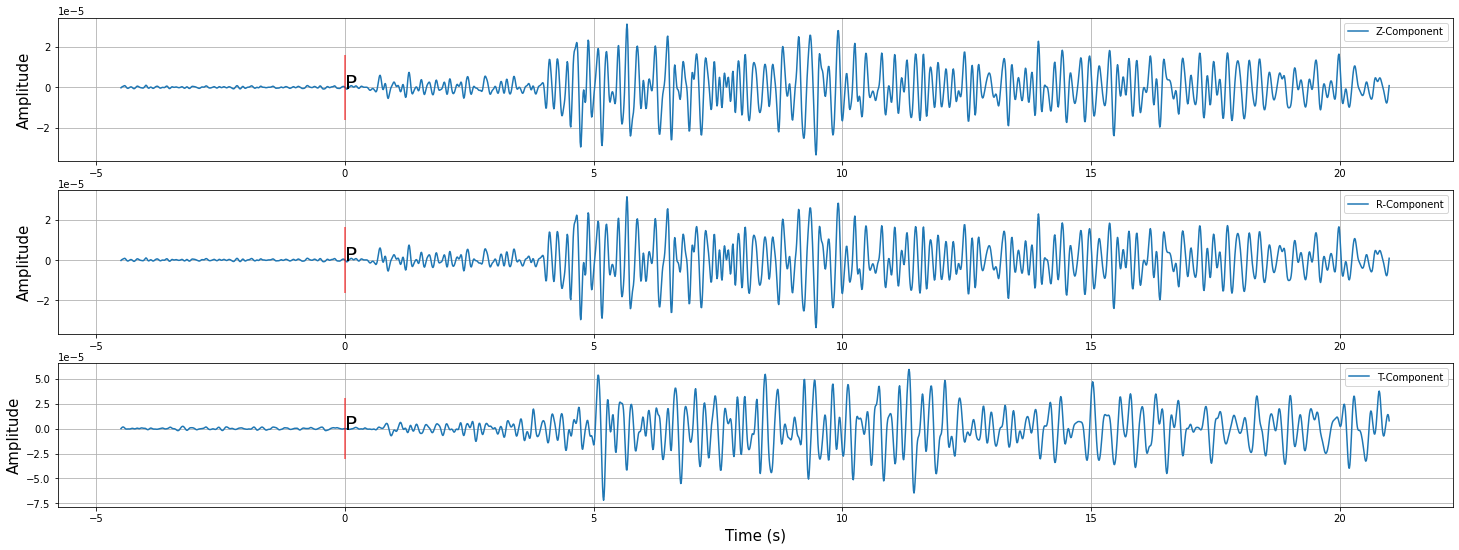

snr of BC.CPX..HHZ | 2022-01-02T00:15:44.079660Z - 2022-01-02T00:18:10.939660Z | 100.0 Hz, 14687 samples: 102.0940791084662
snr of BC.CPX..HHR | 2022-01-02T00:15:44.079660Z - 2022-01-02T00:18:10.939660Z | 100.0 Hz, 14687 samples: 99.96649131374132
snr of BC.CPX..HHT | 2022-01-02T00:15:44.079660Z - 2022-01-02T00:18:10.939660Z | 100.0 Hz, 14687 samples: 109.52266006536148
20220102001614080


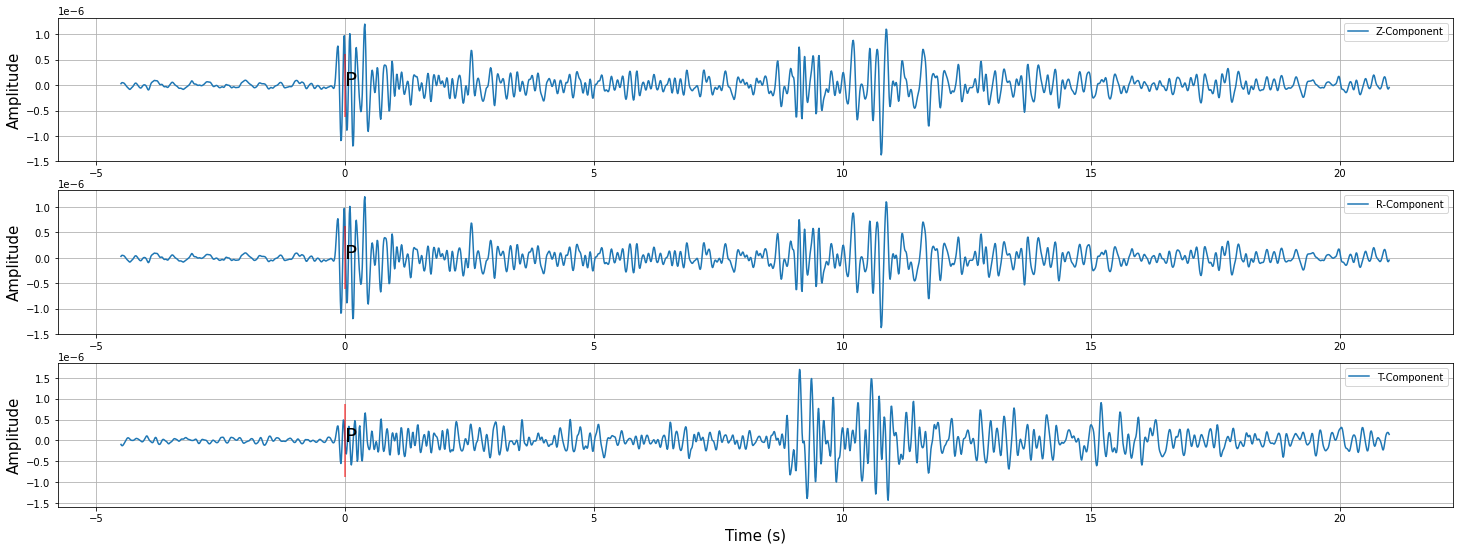

snr of BC.RMX..HHZ | 2022-01-02T00:15:44.076374Z - 2022-01-02T00:18:01.566374Z | 100.0 Hz, 13750 samples: 21.644558308394018
snr of BC.RMX..HHR | 2022-01-02T00:15:44.076374Z - 2022-01-02T00:18:01.566374Z | 100.0 Hz, 13750 samples: 27.57898305637969
snr of BC.RMX..HHT | 2022-01-02T00:15:44.076374Z - 2022-01-02T00:18:01.566374Z | 100.0 Hz, 13750 samples: 38.93842194549378
20220102001614080


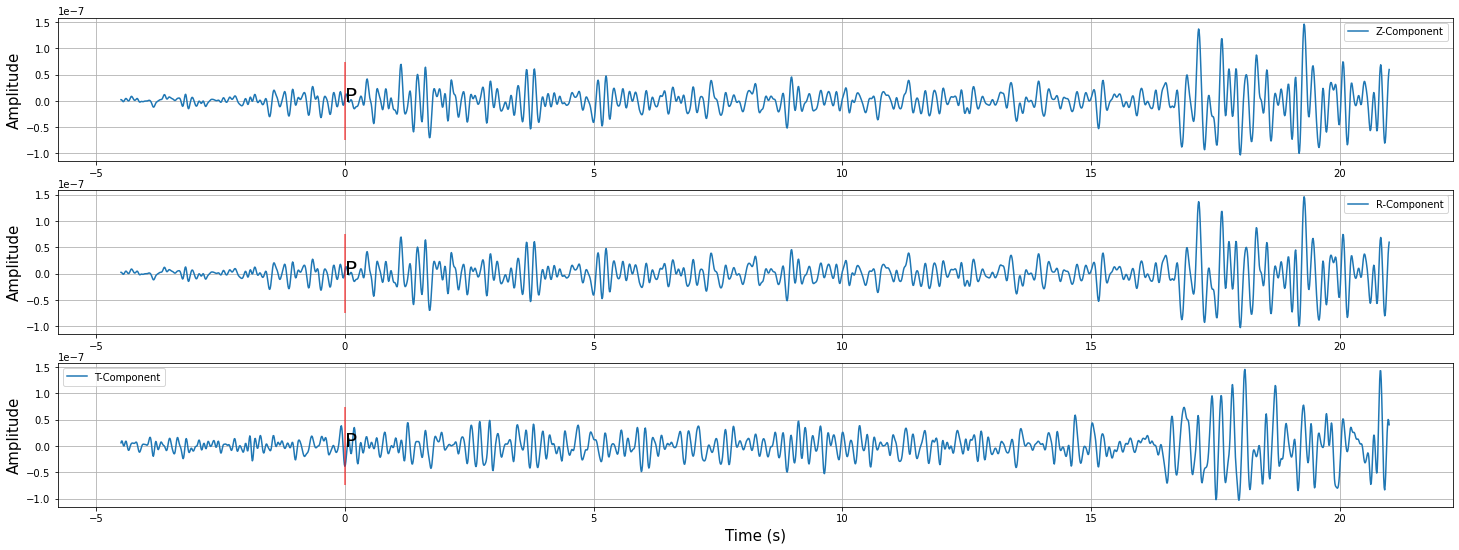

snr of CI.BOR..BHZ | 2022-01-02T00:15:44.081612Z - 2022-01-02T00:17:48.421612Z | 100.0 Hz, 12435 samples: 10.318214790146474
snr of CI.BOR..BHR | 2022-01-02T00:15:44.081612Z - 2022-01-02T00:17:48.421612Z | 100.0 Hz, 12435 samples: 9.666493334792122
snr of CI.BOR..BHT | 2022-01-02T00:15:44.081612Z - 2022-01-02T00:17:48.421612Z | 100.0 Hz, 12435 samples: 5.956608822111979
20220102001614080


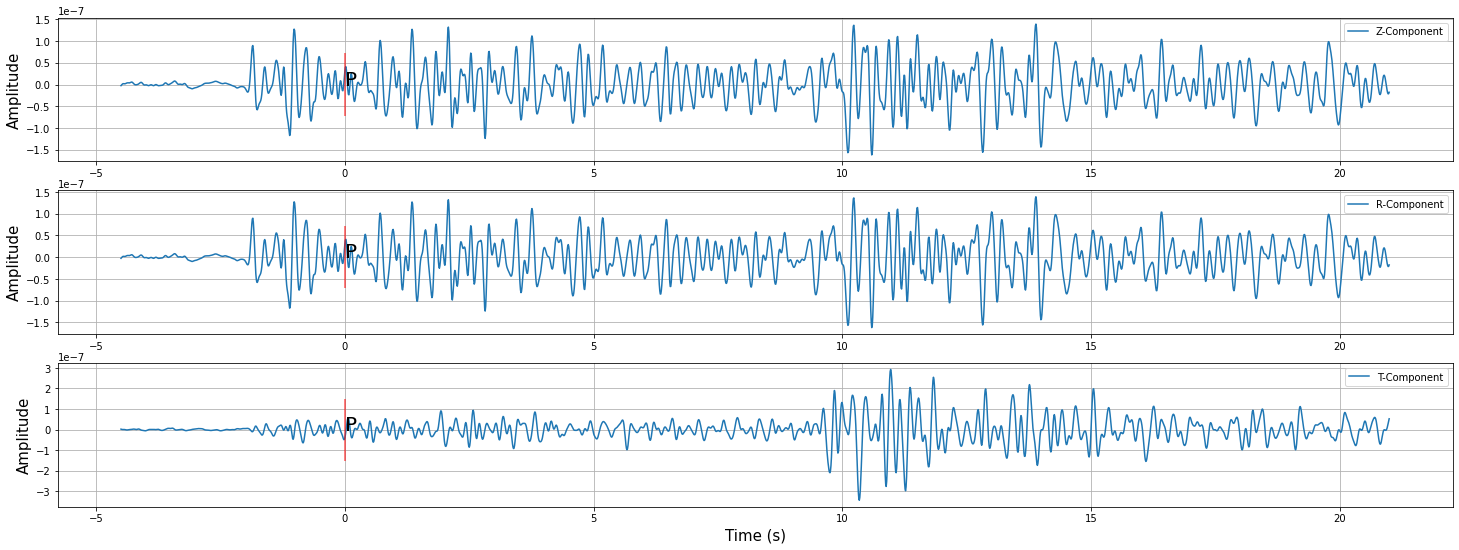

snr of CI.CDD..BHZ | 2022-01-02T00:15:44.078116Z - 2022-01-02T00:17:56.948116Z | 100.0 Hz, 13288 samples: 31.981720817158976
snr of CI.CDD..BHR | 2022-01-02T00:15:44.078116Z - 2022-01-02T00:17:56.948116Z | 100.0 Hz, 13288 samples: 53.66489000945391
snr of CI.CDD..BHT | 2022-01-02T00:15:44.078116Z - 2022-01-02T00:17:56.948116Z | 100.0 Hz, 13288 samples: 62.179688560800464
20220102001614080


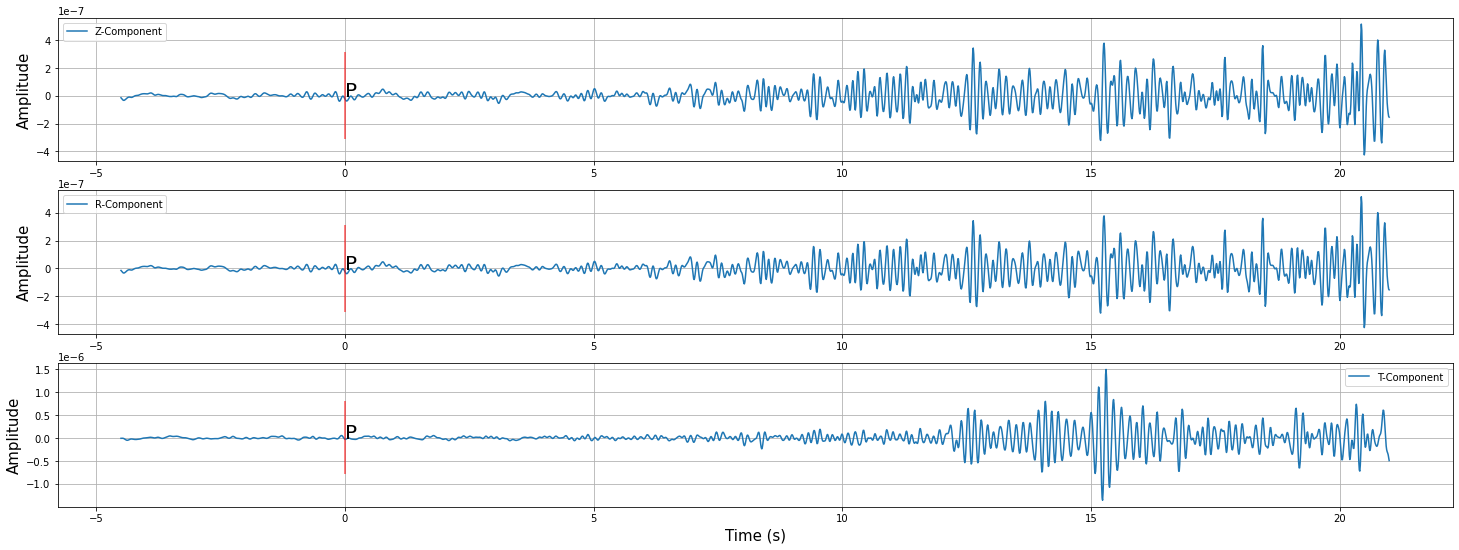

snr of CI.CHR..BHZ | 2022-01-02T00:15:44.078888Z - 2022-01-02T00:17:09.418888Z | 100.0 Hz, 8535 samples: 16.771059040342287
snr of CI.CHR..BHR | 2022-01-02T00:15:44.078888Z - 2022-01-02T00:17:09.418888Z | 100.0 Hz, 8535 samples: 14.695721952427206
snr of CI.CHR..BHT | 2022-01-02T00:15:44.078888Z - 2022-01-02T00:17:09.418888Z | 100.0 Hz, 8535 samples: 14.69849139239346
20220102001614080


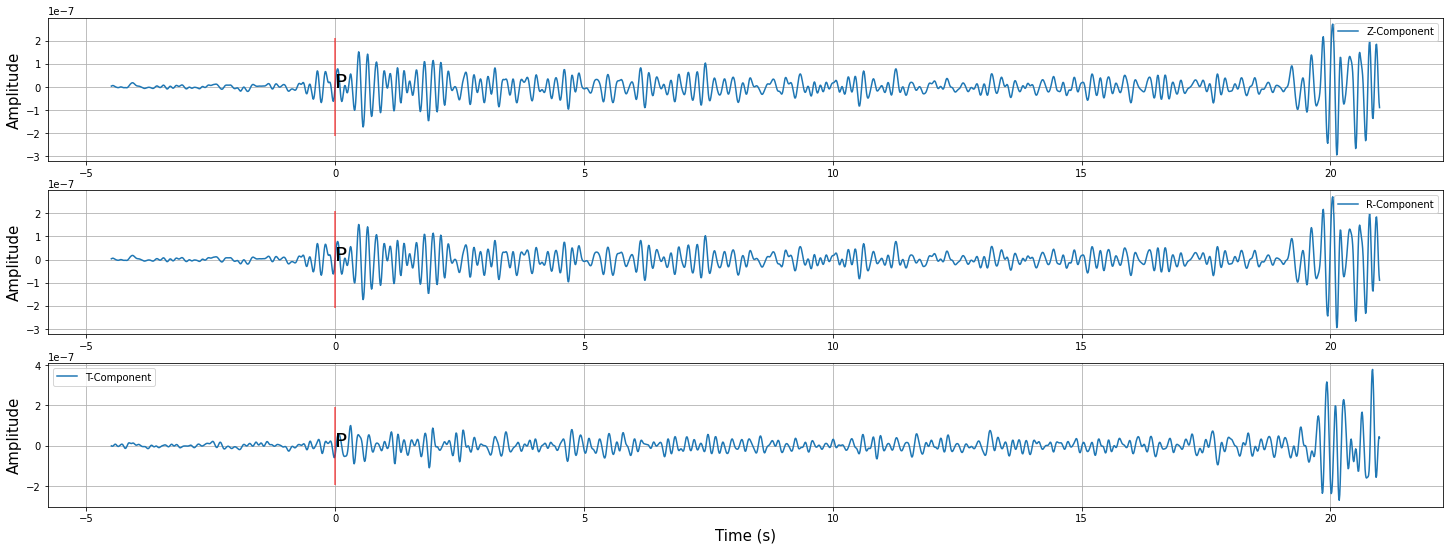

snr of CI.DPP..BHZ | 2022-01-02T00:15:44.080050Z - 2022-01-02T00:17:45.860050Z | 100.0 Hz, 12179 samples: 17.539895907752815
snr of CI.DPP..BHR | 2022-01-02T00:15:44.080050Z - 2022-01-02T00:17:45.860050Z | 100.0 Hz, 12179 samples: 16.184519924408182
snr of CI.DPP..BHT | 2022-01-02T00:15:44.080050Z - 2022-01-02T00:17:45.860050Z | 100.0 Hz, 12179 samples: 11.9385535661475
20220102001614080


SystemExit: 

In [14]:
import obspy
from obspy import read, read_inventory
from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
import os
import glob
import numpy
from shutil import move

TNoise1 = 15  # noise window_left before t1
TNoise2 = 5   # noise window_right before t1
TSignal1 = 5  # signal window_left before t1 ***should this be after?
TSignal2 = 10 

data_sac = './Download/SAC'
sta_dir = './Download/stations'
num_graphs = 10
for ev in sorted(os.listdir(data_sac)):
#for ev in sorted(glob.glob(f"{data_sac}/NC.NSM")):
    #print(ev)
    
    inpath = os.path.join(data_sac, ev)
    
    funiq = []
    for sac in glob.glob(f"{inpath}/*[ZRT].SAC.bp.cut"):
        st = obspy.read(sac)
        funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
    fU = sorted(set(funiq))
    
    for sacfile in fU:
        st = obspy.read(f"{inpath}/{sacfile}*[ZRT].SAC.bp.cut")
        #print(fU)
        num_graphs -=1
        #print(st)
        #print(f"num:{num_graphs}")
        #print_snr(st[2], TNoise1, TNoise2, TSignal1, TSignal2)
        try:
            print_trace_graphRTZ(st[2], st[0], st[1])
            print_snr(st[2], TNoise1, TNoise2, TSignal1, TSignal2)
            print_snr(st[0], TNoise1, TNoise2, TSignal1, TSignal2)
            print_snr(st[1], TNoise1, TNoise2, TSignal1, TSignal2)
            print(ev)
        except:
            continue
        if num_graphs <1: 
            os.sys.exit()
            